 # rvt_py (RVT) python library rvt.vis module

To load DEM file into numpy array and to store visualizations back to GeoTIFF we will be using rvt.default module (which is based on python gdal library). You can also use rasterio, gdal or any other python library. Import all the modules we will be using:

In [1]:
import rvt.vis  # fro calculating visualizations
import rvt.default  # for loading/saving rasters
import numpy as np
import matplotlib.pyplot as plt  # to plot visualizations

Download test DEM from: https://oblak.fgg.uni-lj.si/s/DHQJkP2sYiCBgtr, create test_data directory and unzip dowloaded zip (test_data) in test_data directory.

In test_data directory is file called "TM1_564_146.tif", this will be our test DEM, from which we will be calculating visualizations. Define string with path to this file (input_dem_path).

In [2]:
dem_path = r"test_data/TM1_564_146.tif"

This module has function get_raster_arr() which reads raster from raster path and returns dictionary with keys "array", "resolution" and "no_data". Key "array" is numpy array of raster, "resolution" is tuple of pixel size where first element is pixel size in x direction and second is in y direction, "no_data" is value which represents noData in raster (array).

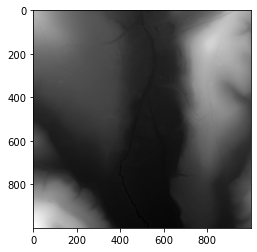

In [3]:
dict_dem = rvt.default.get_raster_arr(dem_path)
dem_arr = dict_dem["array"]  # numpy array of DEM
dem_resolution = dict_dem["resolution"]
dem_res_x = dem_resolution[0]  # resolution in X direction
dem_res_y = dem_resolution[1]  # resolution in Y direction
dem_no_data = dict_dem["no_data"]

plt.imshow(dem_arr, cmap='gray')

## Visualization functions

All visualization functions (Slope, Hillshade, Multiple directions Hillshade, Simple local relief model, Sky-view factor, Anisotropic Sky-view factor, Positive - Openness, Negative - Openness, Sky illumination, Local dominance) takes DEM array as input parameter. They take some parameters which are specific for each visualization and common parameters: ve_factor (vertical exaggeration factor, multipy factor), no_data (value that represents no_data, every function replace all no_data value in array with np.nan), fill_no_data (bool, if True all no_data pixels are replaced with mean of neighbor pixels), keep_original_no_data (fill_no_data has to be True, also a bool if True all visualization array has no_data where dem has no_data). Some visualization functions returns dict which contains numpy array of visualization, some returns directly numpy array of visualization. Visualizations no_data is represented as np.nan (before every vis function starts computing visualization it changes no_data to np.nan).

## Slope Gradient

To calculate slope use rvt.vis.slope_aspect() function. Parameters are: dem, resolution_x, resolution_y, output_units (can be: percent, degree, radian), ve_factor, no_data, fill_no_data, keep_original_no_data. Our DEM doesn't have no data pixels (dem_no_data=None) this is why we will set fill_no_data and original_no_data to False. Function outputs dictonary with keys "slope" and "aspect". Each key contains numpy array.

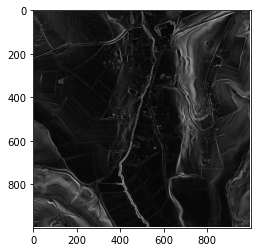

In [4]:
dict_slope_aspect = rvt.vis.slope_aspect(dem=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y, 
                                         output_units="degree", ve_factor=1, no_data=dem_no_data, 
                                         fill_no_data=False, keep_original_no_data=False)
slope_arr = dict_slope_aspect["slope"]

plt.imshow(slope_arr, cmap='gray')

To save visualization use rvt.default.save_raster(). This function takes parameters src_raster_path (dem path to copy geodata), out_raster_path (visualization path), out_raster_arr (visualization numpy array), no_data (how is no data stored, all the visualizations no_data is stored as np.nan), e_type (GDALDataType, for example 6 is for float32 and 1 is for uint8).

In [5]:
slope_path = r"test_data/TM1_564_146_slope.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=slope_path, out_raster_arr=slope_arr, no_data=np.nan,
                        e_type=6)

## Hillshade

To caluclate hillshade use rvt.vis.hillshade() function. Parameters are: dem, resolution_x, resolution_y, sun_azimuth, sun_elevation, ve_factor, no_data, fill_no_data, keep_original_no_data. Function outputs numpy array of hillshade.
    

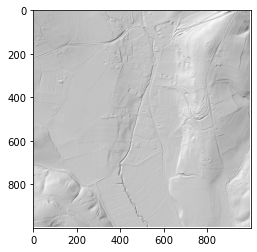

In [6]:
sun_azimuth = 315  # Solar azimuth angle (clockwise from North) in degrees
sun_elevation = 45  # Solar vertical angle (above the horizon) in degrees
hillshade_arr = rvt.vis.hillshade(dem=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y,
                                  sun_azimuth=sun_azimuth, sun_elevation=sun_elevation, ve_factor=1,
                                  no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)

plt.imshow(hillshade_arr, cmap='gray')

In [7]:
hillshade_path = r"test_data/TM1_564_146_hillshade.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=hillshade_path, out_raster_arr=hillshade_arr, no_data=np.nan,
                        e_type=6)

## Multiple directions hillshade

To calculate multiple directions hillshade use rvt.vis.multi_hillshade() function. Parameters are: dem, resolution_x, resolution_y, nr_directions, sun_elevation, ve_factor, no_data, fill_no_data, keep_original_no_data. Function ouputs 3D numpy array (where first dimension represents each direction (nr_directions), for example arr[0] is first direction).

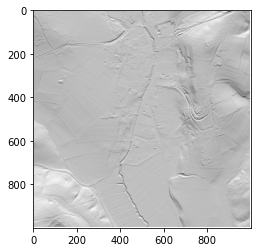

In [8]:
nr_directions = 16  # Number of solar azimuth angles (clockwise from North) (number of directions, number of bands)
sun_elevation = 45  # Solar vertical angle (above the horizon) in degrees
multi_hillshade_arr = rvt.vis.multi_hillshade(dem=dem_arr, resolution_x=dem_res_x, resolution_y=dem_res_y,
                                              nr_directions=nr_directions, sun_elevation=sun_elevation, ve_factor=1,
                                              no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)

plt.imshow(multi_hillshade_arr[0], cmap='gray')  # plot first direction where solar azimuth = 22.5 (360/16=22.5)

When saving multiple direction hillshade array each direction (solar azimuth) will be saved in one band.

In [9]:
multi_hillshade_path = r"test_data/TM1_564_146_multi_hillshade.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=multi_hillshade_path, out_raster_arr=multi_hillshade_arr,
                        no_data=np.nan, e_type=6)

## Simple local relief model

To calculate simple local relief model use rvt.vis.slrm() function. Parameters are: dem, radius_cell, ve_factor, no_data, fill_no_data, keep_original_no_data. Fucntion numpy array of simple local relief model.


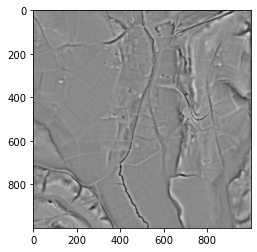

In [10]:
radius_cell = 15  # radius to consider in pixels (not in meters)
slrm_arr = rvt.vis.slrm(dem=dem_arr, radius_cell=radius_cell, ve_factor=1, no_data=dem_no_data, fill_no_data=False,
                        keep_original_no_data=False)

plt.imshow(slrm_arr, cmap='gray')

In [11]:
slrm_path = r"test_data/TM1_564_146_slrm.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=slrm_path, out_raster_arr=slrm_arr,
                        no_data=np.nan, e_type=6)

## Sky-view factor, Anisotropic Sky-view factor, Positive - Openness

Sky-view factor, Anisotropic Sky-view factor and Openness are all calculated with the same function. To calculate them use rvt.vis.sky_view_factor(). Parameters are: dem, resolution, compute_svf (bool, if true it computes sky-view factor), compute_asvf (bool, if true it computes anisotropic svf), copmute_opns (bool, if true it computes positive openness), svf_n_dir (number of directions), svf_r_max (maximal search radius in pixels), svf_noise (level of noise remove (0-don't remove, 1-low, 2-med, 3-high)), asvf_level (level of anisotropy, 1-low, 2-high), asvf_dir (direction of anisotropy), ve_factor, no_data, fill_no_data, keep_original_no_data. Fucntion outputs dictionary with keys: "svf" (if copute_svf is true), "asvf" (if copute_asvf is true), "opns" (if copute_opns is true). Each key contains numpy array of visualization

In [12]:
# svf, sky-view factor parameters which also applies to asvf and opns
svf_n_dir = 16  # number of directions
svf_r_max = 10  # max search radius in pixels
svf_noise = 0  # level of noise remove (0-don't remove, 1-low, 2-med, 3-high)
# asvf, anisotropic svf parameters
asvf_level = 1  # level of anisotropy (1-low, 2-high)
asvf_dir = 315  # dirction of anisotropy in degrees
dict_svf = rvt.vis.sky_view_factor(dem=dem_arr, resolution=dem_res_x, compute_svf=True, compute_asvf=True, compute_opns=True,
                                   svf_n_dir=svf_n_dir, svf_r_max=svf_r_max, svf_noise=svf_noise,
                                   asvf_level=asvf_level, asvf_dir=asvf_dir,
                                   no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)
svf_arr = dict_svf["svf"]  # sky-view factor
asvf_arr = dict_svf["asvf"]  # anisotropic sky-view factor
opns_arr = dict_svf["opns"]  # positive openness

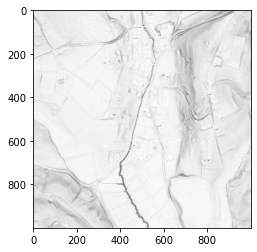

In [13]:
plt.imshow(svf_arr, cmap='gray')

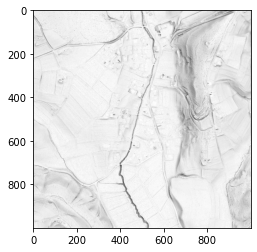

In [14]:
plt.imshow(asvf_arr, cmap='gray')

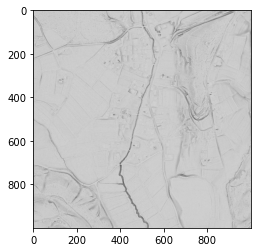

In [15]:
plt.imshow(opns_arr, cmap="gray")

To save:

In [16]:
svf_path = r"test_data/TM1_564_146_svf.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=svf_path, out_raster_arr=svf_arr,
                        no_data=np.nan, e_type=6)
asvf_path = r"test_data/TM1_564_146_asvf.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=asvf_path, out_raster_arr=asvf_arr,
                        no_data=np.nan, e_type=6)
opns_path = r"test_data/TM1_564_146_pos_opns.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=opns_path, out_raster_arr=opns_arr,
                        no_data=np.nan, e_type=6)

## Negative - Openness

Negative openness is calculated the same as postive openness but we have to multiply input DEM with -1.

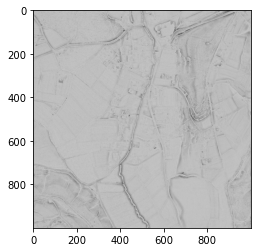

In [17]:
# svf, sky-view factor parameters which also applies to asvf and opns
svf_n_dir = 16  # number of directions
svf_r_max = 10  # max search radius in pixels
svf_noise = 0  # level of noise remove (0-don't remove, 1-low, 2-med, 3-high)
dem_arr_neg_opns = dem_arr * -1  # dem * -1 for neg opns 
# we don't need to calculate svf and asvf (compute_svf=False, compute_asvf=False)
dict_svf = rvt.vis.sky_view_factor(dem=dem_arr_neg_opns, resolution=dem_res_x, compute_svf=False, compute_asvf=False, compute_opns=True,
                                   svf_n_dir=svf_n_dir, svf_r_max=svf_r_max, svf_noise=svf_noise,
                                   no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)
neg_opns_arr = dict_svf["opns"]

plt.imshow(neg_opns_arr, cmap='gray')

In [18]:
neg_opns_path = r"test_data/TM1_564_146_neg_opns.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=neg_opns_path, out_raster_arr=neg_opns_arr,
                        no_data=np.nan, e_type=6)

## Local dominance

To calculate local dominance use rvt.vis.local_dominance() function. Parameters are: dem, min_rad (minimum radial distance (in pixels) at which the algorithm starts with visualization computation), max_rad (maximum radial distance (in pixels) at which the algorithm starts with visualization computation), rad_inc (radial distance steps in pixels), angular_res (angular step for determination of number of angular directions), observer_height (height at which we observe the terrain), ve_factor, no_data, fill_no_data, keep_original_no_data. Fucntion outputs numpy array of local dominance.


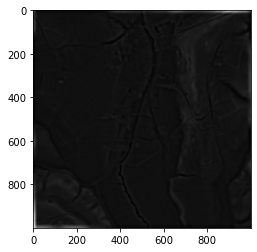

In [23]:
min_rad = 10  # minimum radial distance
max_rad = 20  # maximum radial distance
rad_inc = 1  # radial distance steps in pixels
angular_res = 15 # angular step for determination of number of angular directions
observer_height = 1.7  # height at which we observe the terrain
local_dom_arr = rvt.vis.local_dominance(dem=dem_arr, min_rad=min_rad, max_rad=max_rad, rad_inc=rad_inc, angular_res=angular_res,
                                       observer_height=observer_height, ve_factor=1,
                                       no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)

plt.imshow(local_dom_arr, cmap='gray')

In [24]:
local_dom_path = r"test_data/TM1_564_146_local_dominance.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=local_dom_path, out_raster_arr=local_dom_arr,
                        no_data=np.nan, e_type=6)

## Sky illumination

To calculate sky_illumination use rvt.vis.sky_illumination() function. Parameters are: dem, resolution, sky_model ("overcast" or "uniform"), compute_shadow (boolean if true it adds shadow), max_fine_radius (max shadow modeling distance in pixels), num_directions (number of directions to search for horizon), shadow_az (shadow azimuth if copute_shadow is true), shadow_el (shadow elevation if compute_shadow is true), ve_factor, no_data, fill_no_data, keep_original_no_data. Fucntion outputs numpy array of sky illumination.


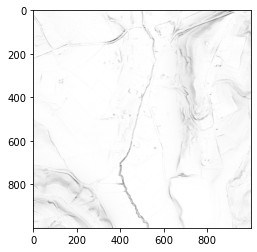

In [25]:
sky_model = "overcast"  # could also be uniform
max_fine_radius = 100
num_directions = 32
compute_shadow = True
shadow_az = 315
shadow_el = 35
sky_illum_arr = rvt.vis.sky_illumination(dem=dem_arr, resolution=dem_res_x, sky_model=sky_model,
                                         max_fine_radius=max_fine_radius, num_directions=num_directions,
                                         shadow_az=shadow_az, shadow_el=shadow_el, ve_factor=1,
                                         no_data=dem_no_data, fill_no_data=False, keep_original_no_data=False)

plt.imshow(sky_illum_arr, cmap='gray')

In [26]:
sky_illum_path = r"test_data/TM1_564_146_sky_illumination.tif"
rvt.default.save_raster(src_raster_path=dem_path, out_raster_path=sky_illum_path, out_raster_arr=sky_illum_arr,
                        no_data=np.nan, e_type=6)